In [1]:
# Fine Tuning

In [2]:
!nvidia-smi

Thu Jan 12 16:22:41 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Creating helper functions

In [3]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-01-12 16:22:41--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-01-12 16:22:41 (99.2 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [4]:
# Import helper functions
from helper_functions import create_tensorboard_callback,plot_loss_curves,unzip_data,walk_through_dir

## Getting some Data

In [5]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data('10_food_classes_10_percent.zip')

--2023-01-12 16:22:44--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 172.217.218.128, 142.250.145.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  40.5MB/s    in 4.6s    

2023-01-12 16:22:49 (35.2 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [6]:
# Check out how many images and subdirectories are in our datasets
walk_through_dir('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [7]:
# Create training and test directory paths
train_dir = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_10_percent/test'

In [8]:
import tensorflow as tf

IMG_SIZE = (224,224)
BATCH_SIZE = 32

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode = 'categorical',
                                                                            batch_size=BATCH_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode='categorical',
                                                                batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [9]:
# Check out the class names of our dataset
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [10]:
# See an example of a batch of data
for images,labels in train_data_10_percent.take(1):
  print(images,labels)

tf.Tensor(
[[[[121.57143    140.57143    183.57143   ]
   [119.28571    136.2857     180.2857    ]
   [115.78061    129.41327    174.41327   ]
   ...
   [188.64285     60.642857     0.        ]
   [189.31123     61.31123      0.        ]
   [189.77042     61.77042      0.        ]]

  [[133.66837    154.66837    201.52551   ]
   [131.85204    149.85204    197.70918   ]
   [131.18367    147.34184    194.02551   ]
   ...
   [190.78574     62.785736     0.        ]
   [191.92856     63.92856      0.92855835]
   [189.71425     61.71425      0.        ]]

  [[122.77551    144.70918    196.13266   ]
   [126.841835   147.14285    198.69897   ]
   [128.73979    146.14285    196.73979   ]
   ...
   [189.40308     62.045937     0.        ]
   [189.30101     61.943867     0.        ]
   [187.57143     60.214287     0.        ]]

  ...

  [[  9.653024    13.653024    24.867289  ]
   [  9.857164    13.857164    25.071428  ]
   [  8.42855     12.42855     23.5969    ]
   ...
   [ 58.785736    70.214

## Model 0 : Functional API
Building a transfer learning model using Keras Functional API

Functional API provides more flexibility than the Sequential

In [11]:
# 1. Create a model with keras.applications
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# 2. Freeze the base model (so the underlying pre-trained patterns aren't updated during training)
base_model.trainable = False

# 3. Create inputs into our model
inputs = tf.keras.layers.Input(shape=(224,224,3),name='input_layer')

# 4. If using a model like ResNet50V02 you will need to normalize inputs (No need for EfficientNets)
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# 5. Pass the inputs to the base_model
x = base_model(inputs)
print(f'Shape after passing inputs through base model: {x.shape}')

# 6. Average pool the outputs of the base model (aggregate all the most important information,reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
print(f'Shape after GlobalAveragePooling2D: {x.shape}')

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(10,activation='softmax',name='output_layer')(x)

# 8. Combine the inputs with the outputs into a model
model_0 = tf.keras.Model(inputs,outputs)

# 9. Compile the model
model_0.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# 10. Fit the model
history_0 = model_0.fit(train_data_10_percent,
                        epochs = 5,
                        steps_per_epoch = len(train_data_10_percent),
                        validation_data = test_data,
                        validation_steps = int(0.25*len(test_data)),
                        callbacks = [create_tensorboard_callback(dir_name='transfer_learning',
                                                                 experiment_name='10_percent_feature_extraction')])

16705208/16705208 [==============================] - 1s 0us/step
Shape after passing inputs through base model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D: (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20230112-162301
Epoch 1/5
24/24 [==============================] - 19s 262ms/step - loss: 1.8973 - accuracy: 0.4307 - val_loss: 1.3099 - val_accuracy: 0.7105
Epoch 2/5
24/24 [==============================] - 4s 157ms/step - loss: 1.1090 - accuracy: 0.7533 - val_loss: 0.8440 - val_accuracy: 0.8059
Epoch 3/5
24/24 [==============================] - 5s 186ms/step - loss: 0.7851 - accuracy: 0.8293 - val_loss: 0.6820 - val_accuracy: 0.8438
Epoch 4/5
24/24 [==============================] - 4s 154ms/step - loss: 0.6408 - accuracy: 0.8600 - val_loss: 0.6098 - val_accuracy: 0.8569
Epoch 5/5
24/24 [==============================] - 5s 188ms/step - loss: 0.5491 - accuracy: 0.8933 - val_loss: 0.5591 - val_accuracy: 0.8569


In [12]:
# Evaluate on the full test dataset
model_0.evaluate(test_data)

79/79 [==============================] - 7s 79ms/step - loss: 0.5448 - accuracy: 0.8636


[0.5448317527770996, 0.8636000156402588]

In [13]:
# Check the layers in our base model
for layer_number,layer in enumerate(base_model.layers):
  print(layer_number,layer.name)

0 input_1
1 rescaling
2 normalization
3 tf.math.truediv
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activati

In [14]:
# How about we get a summary of the base model?
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

In [15]:
# How about a summary of our whole model?
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


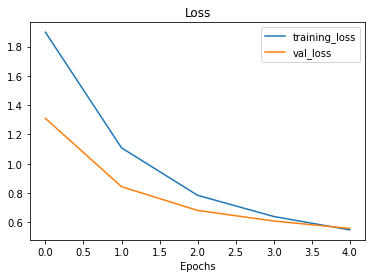

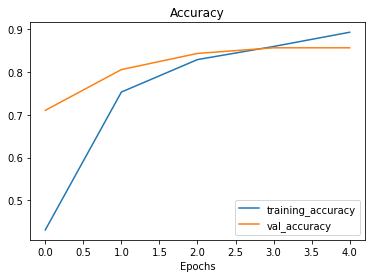

In [16]:
# Check out our model's training curves
plot_loss_curves(history_0)

## Getting a Feature vector from a trained model

Let's demonstrate the global Average Pooling 2D layer.....

We have a tensor after our model goes through 'base_model' of shape (None,7,7,1280).

But then when it passes through GlobalAveragePooling2D, it turns into (None,1280)

Let's use a similar shaped tensor of (1,4,4,3) and then pass it to GlobalAveragePooling2D

In [17]:
# Define the input shape
input_shape = (1,4,4,3)

# Create a random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f'Rnadom input tensor:\n {input_tensor} \n')

# Pass the random tensor through a global average pooling 2D layer
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f'2D global average pooled random tensor:\n {global_average_pooled_tensor}\n')

# check the shape of the different tensors
print(f'Shape of input tensor: {input_tensor.shape}')
print(f'Shape of Global Average Pooled 2D : {global_average_pooled_tensor.shape}')


Rnadom input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]] 

2D global average pooled random tensor:
 [[-0.09368646 -0.45840448 -0.2885598 ]]

Shape of input tensor: (1, 4, 4, 3)
Shape of Global Average Pooled 2D : (1, 3)


In [18]:
 # Let's replicate the GlobalAveragePool2D layer
 tf.reduce_mean(input_tensor,axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

# Running a series of transfer learning Experiments

How will it go with 1% of training data? 

1. 'model_1' - use feature extraction transfer learning with 1% of the training data with data augmentation
2. 'model_2' - use feature extraction transfer learning with 10% of the training with data augmentation
3. 'model_3' - use fine-tuning transfer learning on 10% of the training data with data augmentation
4. 'model_4' - use fine-tuning transfer learning on 100% of the training data with data augmentation

**Note:** throughout the same test dataset will be used to evaluate our model. This ensures consitency across evaluation metrics.

## Getting and preprocessing data for model_1

In [19]:
# Download and unzip data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data('10_food_classes_1_percent.zip')

--2023-01-12 16:23:55--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.145.128, 74.125.128.128, 108.177.127.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.145.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  36.6MB/s    in 3.8s    

2023-01-12 16:23:59 (33.3 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [20]:
# Create training and test dirs
train_dir_1_percent = '10_food_classes_1_percent/train' 
test_dir  = '10_food_classes_1_percent/test'

In [21]:
# How many images are we working with
walk_through_dir('10_food_classes_1_percent')

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'

In [22]:
# Setup the data loaders
IMG_SIZE = (224,224)
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           label_mode='categorical',
                                                                           image_size=IMG_SIZE,
                                                                           batch_size=32)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                           label_mode='categorical',
                                                                           image_size=IMG_SIZE,
                                                                           batch_size=32)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


## Adding data augmentation

In [23]:
print(tf.__version__)

2.9.2


In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create data augmentation stage with horizontal flipping, rotations , zooms, etc
data_augmentation = keras.Sequential([
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    # preprocessing.Rescale(1./255) # Keep for models like ResNet50V2
],name='data_augmentation')


### Visualize our data augmentation layer

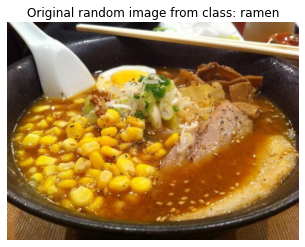

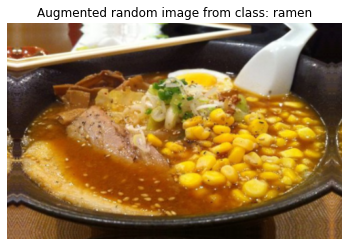

In [25]:
# View a random image and compare it to it's augmented version
import matplotlib.pyplot as plt
import matplotlib.image as mpimp
import os
import random
target_class = random.choice(train_data_1_percent.class_names)
target_dir = '10_food_classes_1_percent/train/' + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + '/' + random_image

# Read in the random image
img = mpimp.imread(random_image_path)
plt.imshow(img)
plt.title(f'Original random image from class: {target_class}')
plt.axis(False);
# print(random_image)

# Plot our augmented random image
augmented_img = data_augmentation(tf.expand_dims(img,axis=0),training=True)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.)
plt.title(f'Augmented random image from class: {target_class}')
plt.axis(False);

## Model 1: Feature extraction transfer learning on 1% of the data with data augmentation

In [26]:
# Setup input shape and base model, freezing the base model layers
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create input layer
inputs = layers.Input(shape=input_shape,name='input_layer')

# Add in data augmentation Sequential model as a layer
x = data_augmentation(inputs)

# Give base_model the inputs (after augmentation) and don't train it
x = base_model(x,training=False)

# Pool output features of the base model
x = layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)

# Put a dense layer on as the output
output = layers.Dense(10,activation='softmax',name='outplut_layer')(x)

# Make a model 
model_1 = keras.Model(inputs,output)

# Compile the model
model_1.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# Fit the model
history_1 = model_1.fit(train_data_1_percent,
                        epochs=5,
                        steps_per_epoch = len(train_data_1_percent),
                        validation_data=test_data,
                        validation_steps = int(0.25*len(test_data)),
                        callbacks=[create_tensorboard_callback(dir_name='transfer_learning',
                                                               experiment_name='1_percent_data_aug')])

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20230112-162403
Epoch 1/5
3/3 [==============================] - 10s 2s/step - loss: 2.4087 - accuracy: 0.1429 - val_loss: 2.2431 - val_accuracy: 0.1809
Epoch 2/5
3/3 [==============================] - 3s 1s/step - loss: 2.1443 - accuracy: 0.2286 - val_loss: 2.1281 - val_accuracy: 0.2467
Epoch 3/5
3/3 [==============================] - 6s 3s/step - loss: 1.9481 - accuracy: 0.3571 - val_loss: 2.0009 - val_accuracy: 0.3059
Epoch 4/5
3/3 [==============================] - 4s 2s/step - loss: 1.8356 - accuracy: 0.5571 - val_loss: 1.9035 - val_accuracy: 0.3997
Epoch 5/5
3/3 [==============================] - 4s 1s/step - loss: 1.6394 - accuracy: 0.6286 - val_loss: 1.7999 - val_accuracy: 0.4490


In [27]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 outplut_layer (Dense)       (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [28]:
model_1.evaluate(test_data)

79/79 [==============================] - 6s 74ms/step - loss: 1.8044 - accuracy: 0.4448


[1.804432988166809, 0.4447999894618988]

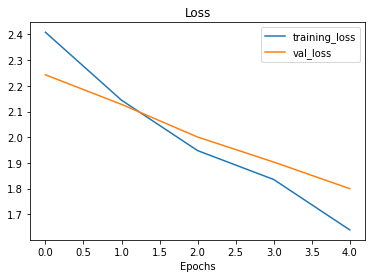

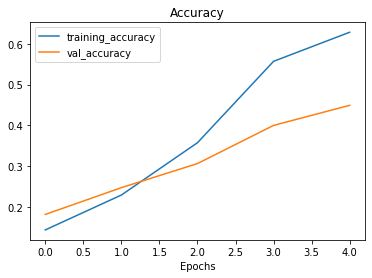

In [29]:
plot_loss_curves(history_1)

## Model 02: Feature extraction transfer learning model with 10% of data and data augmentation

In [36]:
# Get 10% of data

# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

# unzip_data('10_food_classes_10_percent.zip')

train_dir_10_percent = '/content/10_food_classes_10_percent/train'
test_dir = '/content/10_food_classes_10_percent/test'

In [38]:
# How many images are in our directories?
walk_through_dir('/content/10_food_classes_10_percent')

There are 2 directories and 0 images in '/content/10_food_classes_10_percent'.
There are 10 directories and 0 images in '/content/10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '/content/10_food_cl

In [37]:
# Set up data loaders
import tensorflow as tf
IMG_SIZE = (224,224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                            label_mode='categorical',
                                                                            image_size = IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode='categorical',
                                                                image_size=IMG_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [45]:
# Create data augmentation layer
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

# Build data augmentation layer
data_augmentation = Sequential([
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomRotation(0.2),
    # preprocessing.Rescaling(1./255) # No need since we are using effiecientNet
],name='augmentation')


# Setup the input shape to our model
input_shape = (224,224,3)

# Create a frozen base model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create the inputs and outputs (including the layers in between)
inputs = layers.Input(shape=input_shape,name='input_layer')
x = data_augmentation(inputs)
x = base_model(x,training=False) # pass the augmentated images to the base model but keep it in inference mode
x = layers.GlobalAveragePooling2D(name='global_average_pooling_2D')(x)
outputs = layers.Dense(10,activation='softmax',name='output_layer')(x)
model_2 = tf.keras.Model(inputs,outputs)

# Compile
model_2.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)


In [46]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 augmentation (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_2D (  (None, 1280)             0         
 GlobalAveragePooling2D)                                         
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
____________________________________________

### Creating a ModelCheckpoint callbacks

The ModelCheckpoint callback intermediately saves our model (the full model or just the weights) during training. This is useful so we can come and start where we left off

In [47]:
# Set Checkpoint paths
checkpoint_path = 'ten_percent_model_checkpoints_weights/checkpoints.ckpt'

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         save_freq='epoch', # save ever epoch
                                                         verbose=1)

### Fit model 2 and passing in the ModelCheckpoint callback

In [48]:
#Fit the model
initial_epochs = 5
history_2 = model_2.fit(train_data_10_percent,
                        epochs=initial_epochs,
                        validation_data=test_data,
                        validation_steps = int(0.25*len(test_data)),
                        callbacks = [create_tensorboard_callback(dir_name='transfer_learning',
                                                                 experiment_name='10_percent_data_aug'),
                                     checkpoint_callback]
                        )


Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20230112-170550
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.9846 - accuracy: 0.3520
Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoints.ckpt
24/24 [==============================] - 21s 589ms/step - loss: 1.9846 - accuracy: 0.3520 - val_loss: 1.4294 - val_accuracy: 0.6727
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3038 - accuracy: 0.6933
Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoints.ckpt
24/24 [==============================] - 11s 429ms/step - loss: 1.3038 - accuracy: 0.6933 - val_loss: 0.9808 - val_accuracy: 0.8026
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0041 - accuracy: 0.7573
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoints.ckpt
24/24 [==============================] - 10s 414ms/step - loss: 1.0041 - accuracy: 0.7573 - val_loss: 0.8153 - val_accuracy: 0.809

In [49]:
# What were model_0 results?
model_0.evaluate(test_data)

79/79 [==============================] - 8s 84ms/step - loss: 0.5448 - accuracy: 0.8636


[0.5448315739631653, 0.8636000156402588]

In [50]:
# Check model_2 results
results_10_percent_data_aug = model_2.evaluate(test_data)
results_10_percent_data_aug

79/79 [==============================] - 7s 81ms/step - loss: 0.6275 - accuracy: 0.8404


[0.6274694204330444, 0.840399980545044]

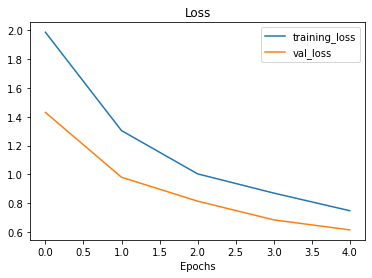

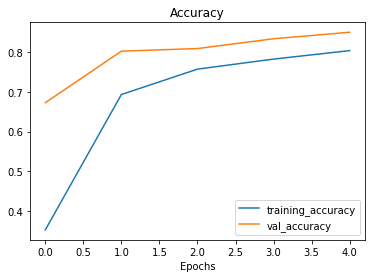

In [51]:
# Plot loss curves
plot_loss_curves(history_2)

### Loading in checkpointed weights

Loading in checkpointed weights returns a model to a specific checkpoint.

In [52]:
# Load in saved model weights and evaluate model
model_2.load_weights(checkpoint_path)

In [53]:
# Evaluate model_2 with loaded weights
loaded_weights_model_results = model_2.evaluate(test_data)

79/79 [==============================] - 8s 89ms/step - loss: 0.6275 - accuracy: 0.8404


In [55]:
# If the results from our previously evaluated model_2 match the loaded weights, everything has worked!
results_10_percent_data_aug == loaded_weights_model_results

False

In [56]:
results_10_percent_data_aug

[0.6274694204330444, 0.840399980545044]

In [57]:
loaded_weights_model_results

[0.6274692416191101, 0.840399980545044]

In [58]:
# Check to see if loaded model results are very close to our previoys non-loaded model results
import numpy as np 
np.isclose(results_10_percent_data_aug,loaded_weights_model_results)

array([ True,  True])

## Model 3: Fine-tuning an existing model on 10% of the data

> 🔑 **Note:** Fine-tuning usually works best *after* training a feature extraction model for a few epochs with large amounts of custom data.

In [59]:
model_2.layers

In [60]:
for layer in model_2.layers:
  print(layer,layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7fc34f30c880> True
<keras.engine.sequential.Sequential object at 0x7fc34f6fbc10> True
<keras.engine.functional.Functional object at 0x7fc34ecac4c0> False
<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7fc34f33be80> True
<keras.layers.core.dense.Dense object at 0x7fc34f34f700> True


In [61]:
for i,layer in enumerate(model_2.layers[2].layers):
  print(i,layer.name,layer.trainable)

0 input_5 False
1 rescaling_4 False
2 normalization_4 False
3 tf.math.truediv_4 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeez

In [63]:
# To begin fine-tuning,let's start by setting the last 10 layers of our base_model.trainable = True
base_model.trainable = True

# Freeze all layers except for the last 10
for layer in base_model.layers[:-10]:
  layer.trainable = False

# Recompile (Since we made a change)
model_2.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr=0.0001),# When fine-tuning, typically we lower the lr by 10x*
    metrics = ['accuracy']
)


**Note:** When using fine-tuning it's best practice is to lower the learning rate by some amount. A good rule of thumb is at least 10x

Good resource : ULMFit paper: https://arxiv.org/pdf/1801.06146.pdf

In [64]:
# Check which layers are trainable
for layer_number,layer in enumerate(model_2.layers[2].layers):
  print(layer_number,layer.name,)

0 input_5
1 rescaling_4
2 normalization_4
3 tf.math.truediv_4
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_ac

In [66]:
# How many trainable variables?
print(len(model_2.trainable_variables))

12


In [67]:
# Fine tune for another 5 epochs
fine_tune_epochs = initial_epochs+5

# Refit the model (same as model_2 except with more trainable layers)
history_2_fine_tune = model_2.fit(train_data_10_percent,
                        epochs=fine_tune_epochs,
                        validation_data=test_data,
                        validation_steps = int(0.25*len(test_data)),
                        initial_epoch=history_2.epoch[-1], #start training form previous last epoch
                        callbacks = [create_tensorboard_callback(dir_name='transfer_learning',
                                                                 experiment_name='10_percent_fine_tune_last_10')]
                        )

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20230112-180450
Epoch 5/10
24/24 [==============================] - 20s 483ms/step - loss: 0.7035 - accuracy: 0.7733 - val_loss: 0.4958 - val_accuracy: 0.8306
Epoch 6/10
24/24 [==============================] - 10s 387ms/step - loss: 0.3572 - accuracy: 0.8907 - val_loss: 0.5405 - val_accuracy: 0.8273
Epoch 7/10
24/24 [==============================] - 10s 388ms/step - loss: 0.2161 - accuracy: 0.9400 - val_loss: 0.5028 - val_accuracy: 0.8289
Epoch 8/10
24/24 [==============================] - 9s 345ms/step - loss: 0.2054 - accuracy: 0.9373 - val_loss: 0.5135 - val_accuracy: 0.8224
Epoch 9/10
24/24 [==============================] - 8s 336ms/step - loss: 0.1283 - accuracy: 0.9693 - val_loss: 0.5548 - val_accuracy: 0.8273
Epoch 10/10
24/24 [==============================] - 9s 362ms/step - loss: 0.0983 - accuracy: 0.9693 - val_loss: 0.5055 - val_accuracy: 0.8569


In [68]:
# Evaluate the fine-tuned model (model_3 which is actually model_2 fine-tuned for another 5 epochs)
results_fine_tune_10_percent = model_2.evaluate(test_data)

79/79 [==============================] - 8s 78ms/step - loss: 0.5153 - accuracy: 0.8528


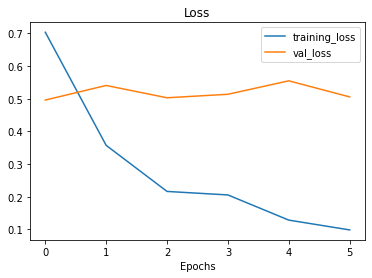

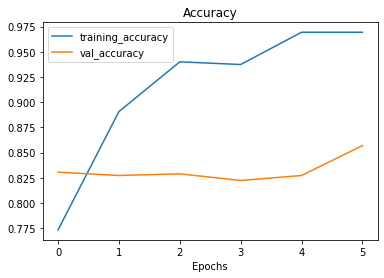

In [69]:
# Check loss curves
plot_loss_curves(history_2_fine_tune)

The `plot_loss_curves` function works great with models which have only been fit once, however, we want something to compare one series of running `fit()` with another (e.g. before and after fine-tuning)

In [82]:
# Let's create a function to compare training histrories
def compare_histories(original_history,new_history,initial_epochs=5):
  # Get original history measurements
  acc = original_history.history['accuracy']
  loss = original_history.history['loss']

  val_acc = original_history.history['val_accuracy']
  val_loss = original_history.history['val_loss']

  # Combine original history
  total_acc = acc + new_history.history['accuracy']
  total_loss = loss + new_history.history['loss']

  total_val_acc = val_acc + new_history.history['val_accuracy']
  total_val_loss = val_loss + new_history.history['val_loss']

  # Make plots for accuracy
  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1)
  plt.plot(total_acc,label='Training Accuracy')
  plt.plot(total_val_acc,label='Validation Accuracy')
  plt.plot([initial_epochs-1,initial_epochs-1],plt.ylim(),label='Start Fine Tuning')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  # Make plots for loss
  plt.figure(figsize=(8,8))
  plt.subplot(2,1,2)
  plt.plot(total_loss,label='Training Loss')
  plt.plot(total_val_loss,label='Validation Loss')
  plt.plot([initial_epochs-1,initial_epochs-1],plt.ylim(),label='Start Fine Tuning')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')

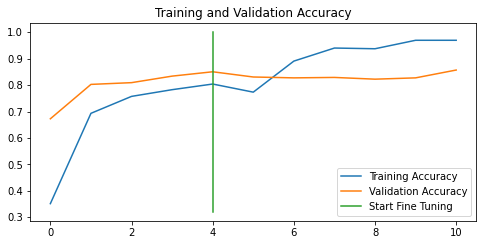

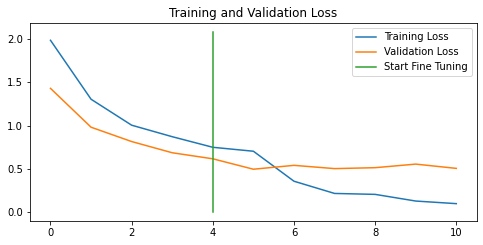

In [83]:
compare_histories(history_2,history_2_fine_tune)

## Model 4: Fine-tuning and existing model on all of the data

In [84]:
# Donwload and unzip data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data('10_food_classes_all_data.zip')

--2023-01-12 18:24:23--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.145.128, 108.177.119.128, 108.177.127.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.145.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  38.7MB/s    in 15s     

2023-01-12 18:24:38 (34.0 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [85]:
# Setup training and test dir
training_dir_all_data = '/content/10_food_classes_all_data/train'
test_dir = '/content/10_food_classes_all_data/test'

In [86]:
# How many images are we working with now?
walk_through_dir('10_food_classes_all_data')

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 

In [87]:
# Setup data inputs 
import tensorflow as tf
IMG_SIZE = (224,224)
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(training_dir_all_data,
                                                                                 label_mode='categorical',
                                                                                 image_size=IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode='categorical',
                                                                image_size=IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


The test dataset we have loaded in is the same as what we have been using for previous experiments. 
Let's verify this...

In [88]:
# Evaluate model 2 (fine-tuned on 10% of data version)
model_2.evaluate(test_data)

79/79 [==============================] - 7s 77ms/step - loss: 0.5153 - accuracy: 0.8528


[0.5152789950370789, 0.8528000116348267]

In [89]:
results_fine_tune_10_percent

[0.5152789950370789, 0.8528000116348267]

To train a fine-tuning model (model_4) we need to revert model_2 to it's feature extraction weights

In [91]:
# Load weights from checkpoint, so that way we can fine-tune 
# from the same stage the 10% data model was fine-tuned from

model_2.load_weights(checkpoint_path)

In [92]:
# Let's evaluate model_2 now
model_2.evaluate(test_data)

79/79 [==============================] - 7s 76ms/step - loss: 0.6275 - accuracy: 0.8404


[0.6274691224098206, 0.840399980545044]

In [94]:
# Check to see if our model)2 has been reverted back to feature extraction results
results_10_percent_data_aug

[0.6274694204330444, 0.840399980545044]

Alright, the previous steps might seem quite confusing but all we've done is:

1. Trained a feature extraction transfer learning model for 5 epochs on 10% of the data (with all base model layers frozen) and saved the model's weights using ModelCheckpoint.

2. Fine-tuned the same model on the same 10% of the data for a further 5 epochs with the top 10 layers of the base model unfrozen.

3. Saved the results and training logs each time.

4. Reloaded the model from 1 to do the same steps as 2 but with all of the data.
The same steps as 2?

Yeah, we're going to fine-tune the last 10 layers of the base model with the full dataset for another 5 epochs but first let's remind ourselves which layers are trainable.

In [96]:
# Chech which layers are tunable in the whole model
for layer_number, layer in enumerate(model_2.layers):
  print(layer_number,layer.name,layer.trainable)


0 input_layer True
1 augmentation True
2 efficientnetb0 True
3 global_average_pooling_2D True
4 output_layer True


In [97]:
# Let's drill into our base_model(efficientnetb0) and see what layers are trainable
for layer_number,layer in enumerate(model_2.layers[2].layers):
  print(layer_number,layer.name,layer.trainable)

0 input_5 False
1 rescaling_4 False
2 normalization_4 False
3 tf.math.truediv_4 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeez

In [98]:
# Compile
model_2.compile(
    loss='categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(lr=0.0001),
    metrics = ['accuracy']
)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [99]:
# Continue to train and fine-tune the model to our data (100% of training data)
fine_tune_epochs = initial_epochs + 5
history_2_full_traing_set = model_2.fit(train_data_10_classes_full,
                                        epochs=fine_tune_epochs,
                                        validation_data=test_data,
                                        validation_steps=int(0.25*len(test_data)),
                                        initial_epoch = history_2.epoch[-1],
                                        callbacks = [create_tensorboard_callback(dir_name='transfer_learning',
                                                                                 experiment_name='full_10_classes_fine_tune_last_10')])

Saving TensorBoard log files to: transfer_learning/full_10_classes_fine_tune_last_10/20230112-184627
Epoch 5/10
235/235 [==============================] - 65s 247ms/step - loss: 0.6635 - accuracy: 0.7872 - val_loss: 0.3505 - val_accuracy: 0.8964
Epoch 6/10
235/235 [==============================] - 53s 224ms/step - loss: 0.5236 - accuracy: 0.8305 - val_loss: 0.2976 - val_accuracy: 0.9128
Epoch 7/10
235/235 [==============================] - 49s 207ms/step - loss: 0.4595 - accuracy: 0.8496 - val_loss: 0.2874 - val_accuracy: 0.9194
Epoch 8/10
235/235 [==============================] - 49s 205ms/step - loss: 0.4312 - accuracy: 0.8611 - val_loss: 0.3059 - val_accuracy: 0.9178
Epoch 9/10
235/235 [==============================] - 45s 188ms/step - loss: 0.3929 - accuracy: 0.8725 - val_loss: 0.2756 - val_accuracy: 0.9079
Epoch 10/10
235/235 [==============================] - 43s 179ms/step - loss: 0.3482 - accuracy: 0.8869 - val_loss: 0.2341 - val_accuracy: 0.9293


In [100]:
# Let's evaluate on all of the test data
results_fine_tune_full_data = model_2.evaluate(test_data)
results_fine_tune_full_data

79/79 [==============================] - 7s 82ms/step - loss: 0.2789 - accuracy: 0.9096


[0.2789369523525238, 0.909600019454956]

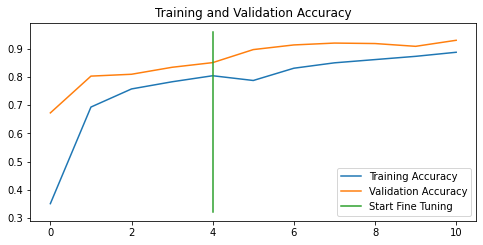

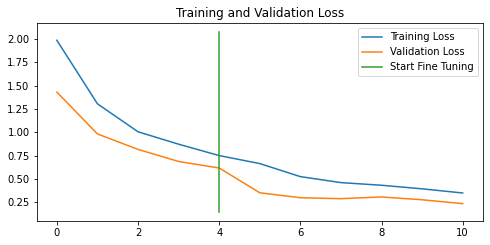

In [101]:
compare_histories(history_2,history_2_full_traing_set)

## Viewing our experiment data on TensorBoard

In [103]:
# View tensorboad logs of transfer learning modelling experiments
# Upload TensorBoard dev records
!tensorboard dev upload --logdir ./transfer_learning \
  --name 'Transfer Learning Experiments with 10 Food101 Classes' \
  --description 'A series of differen transfer leanring experiments with varying amounts of data fine-tuning' \
  --one_shot # exits the uploader once its finished uploading


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./transfer_learning

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=LSbvk1Xkk3PjMt6Vn9u6erBa37ju6G&prompt=consent&access_type=o

In [104]:
# View all uploaded tensorboard experiments
!tensorboard dev list

https://tensorboard.dev/experiment/jHPXURFZRriqlxMaLvU9Bg/
	Name                 Transfer Learning Experiments with 10 Food101 Classes
	Description          A series of differen transfer leanring experiments with varying amounts of data fine-tuning
	Id                   jHPXURFZRriqlxMaLvU9Bg
	Created              2023-01-12 18:58:48 (6 minutes ago)
	Updated              2023-01-12 18:58:55 (6 minutes ago)
	Runs                 10
	Tags                 5
	Scalars              162
	Tensor bytes         0
	Binary object bytes  4332593
https://tensorboard.dev/experiment/AzdgoFyZR12FLBtPfNIOng/
	Name                 EfficientNetB0 vs. ResNet50V2
	Description          Comparing two diffrent TF....
	Id                   AzdgoFyZR12FLBtPfNIOng
	Created              2023-01-08 18:38:43
	Updated              2023-01-08 18:38:45
	Runs                 4
	Tags                 5
	Scalars              60
	Tensor bytes         0
	Binary object bytes  5918466
Total: 2 experiment(s)


In [ ]:
# Deleting an experiment
# !tensorboard dev delete --experiment_id jHPXURFZRriqlxMaLvU9Bg